# Feature Engineering (특성공학) 

**신경망을 위한 데이터 전처리**

* 벡터화(Data Vectorization)
    - 신경망내 모든 입력값과 목표값(Target)은 부동 소수데이터로 이루어진 Tensor이여야 함 
    - 비정형 데이터를 신경망 알고리즘에 적용하기 위해 Tensor로 변환해야 함 
   
* 정규화 (Data Normalization)
    - 신경망의 가중치 보다 큰 데이터이거나, 불균일한 데이터의 경우 모델 형성에 위험이 될 수 있음 
    - 일반적으로 대부분의 input 값이 0 ~ 1사이를 가져야 한다
    - 모든 특성이 대체로 비슷해야 한다 (균일성)
   
* 결측값 (Missing Data) 
    - 신경망 내에서 0값이 사전에 정의되어 있지 않다면, 결측값을 0으로 대처해도 좋다
    - 누락 데이터를 0으로 훈련 한다면, 네트워크가 누락된 값을 무시하고 훈련이 진행됨  

**특성공학**

* 데이터를 간단한 형태로 변환하여 주어진 학습에 대한 문제를 쉽게 만든다 
* 모델링에 있어서 딥러닝 이전엔 (머신러닝) 특성공학이 매우 중요한 부분으로 작용했다
* 기존 머신러닝에서는 알고리즘이 데이터를 표현하는 방식에 따라 성공여부가 달라졌다 
* 딥러닝에서는 특성공학이 크게 필요하지 않음 (원본데이터로 부터 유용한 특성을 찾을 수 있기 때문)
    - 데이터가 적은경우 또는 모델의 성능을 극대화 하는 경우에는 사용해야함 

# Overfitting & Underfitting

* 최적화(Optimization)과 일반화(Generalization)의 Trade off 
    - 최적화(Optimization) : 모델을 최적의 성능으로 향상 시키는 것 
    - 일반화(Generalization) : 모델에 다른 데이터가 들어가도 잘 작동 되는 것 
    
* 데이터 훈련 초기에는 훈련 데이터의 손실이 낮아질수록, 테스트데이터의 손실도 낮아짐 
    - (underfitting: 모델의 최적의 성능이 안나옴 / 학습이 완전히 진행되지 않은 상태)
* 일정 훈련을 지속하고 나면, 일반화가 더 이상 진행되지 않음 
    - (overfitting이 시작됨, 다른 데이터에 대해 적용이 어려워 짐 / 훈련데이터에 특화된 특성만 학습을 시작 함)
* 가장 좋은 방법은 훈련데이터를 많이 모으는 것
* 그러나 더 많은 훈련데이터를 확보하는 것이 어려울 땐 **규제(Regularization)**을 적용     

**Network 축소**
* Overfitting을 조절하는 가장 간단한 방법으로, 모델에 있는 학습 파라미터(모델의 규모, Capacity)를 줄이는 것 
    - 파라미터의 크기는 층 수와, 각 층의 Unit 수에 의해 결정된다.
    - DeepLearning에서 Model에 있는 학습 Parameter 수를 모델의 **Capacity** 라고 표현 (Layer 수, Unit 수)
    - Capacity가 많을 수록 Optimization은 잘 되지만, Generalization은 점점 어려워 진다 
    - Loss를 최소화 하기 위한 Target에 대한 압축된 표현(Capacity가 조절 된)을 학습해야함 
    - 적은 층의 Capacity로 시작해 Test의 Loss가 감소할 때 까지, Capacity를 점진적으로 늘려가면서 Model을 생성하는 것이 좋다 

**DropOut**

* 신경망 규제 방법 중 하나로, 가장 효과적인 방법 
* 특정 Network 층에 Dropout을 적용하면, 훈련 중 무작위로 Layer의 일부 특성을 제외시킨다. 
* Test 단계에서는 Drop out이 발생하지 않으나, 출력값이 Drop out 비율에 비례하여 줄어 듦
* Neural 간 특정 특성에 대한 학습을 방지하고(훈련 세트의 독특한 특성을 학습해 일반화를 저하시키는 특성을 제거) Overfitting을 감소시키는 효과 

# Project. Kick Starter

**Example Data**

* Kickstarter의 Funded Data를 시계열 분석을 통해 성공예측모델 생성 
* 모금기간의 1/3 지점의 Data를 가져와, 모금진행도가 100%가 되는 날짜를 예측 하는 것이 목적 
* 프로젝트마다 모금기간이 다르며, 각 프로젝트에 특성을 추가 할 시 모델 정확도에 어떤 영향이 있는지 확인
* LSTM 알고리즘을 사용/ Dropout 및 Regularization의 적용 여부 판단 

**데이터에 대한 제언**

 - 특정프로젝트의 모금 완료 날짜를 예측하려면, 데이터를 프로젝트 별로 모델을 생성하거나, 프로젝트 분류 별로(항목, 예를 들면 art 부분 만)가져와서 분석을 진행 해야합니다. 
 - 1/3 지점의 데이터를 가져와 모델을 생성한다고 했는데, 그럼 자동화 시스템을 구축해하여, 전체 Project 기간 중 1/3 지점을 지날 때, 데이터를 수집해 각각 Model에 의한 예측값을 계산해야 합니다. (매우 복잡한 시스템을 구축해야 할 것 입니다.)
 - 크롤링 기간도 짧아서 사실상 Time Series를 만들기엔 데이터가 너무 부족합니다.
 - TimeSeries 형태로 특정 일자에 Target값을 예측하기엔, 설명데이터가 불필요해 보입니다. 
 
 
**수업을 위한 단순화**

1. 
     - 목표금액에서 현재모금된 금액의 차이를 계산하여 해당 차액(목표금액까지 남은 금액)을 Target으로 시계열에 따라 예측 실시 
     - 가장 모금 기간이 긴 Tag를 추출해와서 해당 데이터에 대한 모델을 생성 
     - Regularization과 dropout을 적용하기 위해, Capacity를 점진적으로 개선 
 
 
2.  
    - 앞서 전처리한 시계열 데이터에 대한 전체 통계량을 계산 

**라이브러리 호출**

In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

In [250]:
from keras.models import Model 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Dropout

from keras.preprocessing.sequence import pad_sequences

**데이터 호출 및 전처리**

In [70]:
df1 = pd.read_excel("Daily_refactoring_daily 20160429.xlsx")
print(df1.shape)
df1.head()

(536493, 18)


,Project ID,Title,URL,DayN,Crawling Date,Backers,Pledge,Funded,DaysToGo,Rank_Magic,Rank_Popularity,Rank_Most_Funded,Rank_S_Magic,Rank_S_Popularity,Rank_S_Newest,Rank_S_End_Date,Rank_S_Most_Funded,Rewards...
0,prjt1,Give Ear Gospel Songs by Michael hathaway — Ki...,https://www.kickstarter.com/projects/dancineag...,1,2015-11-16,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,prjt1,NaN,NaN,2,2015-11-17,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,prjt1,NaN,NaN,3,2015-11-18,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,prjt1,NaN,NaN,4,2015-11-19,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,prjt1,NaN,NaN,5,2015-11-20,0.0,0.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


* 가장 모금기간이 긴 Project ID 확인

In [76]:
df2 = pd.read_excel("Daily_refactoring_final 20160429.xlsx")
print(df2.shape)
df2.head()

(20502, 36)


,Project ID,Title,URL,Backers,Pledge,Funded,Country,CountryCode,ShortDescription,VideoCount,ImageCount,WebSiteURL,WebSiteCode,Tag,TagCode,Goal,Period,StartDate,EndDate,Creator,Creator Ind,Location,LocationCode,ShortBio,SNS,Fiends,Created,Created Success,Backed,Backed Success,Total Rewards,Comments Creator,Comments User,Total Updates,Updates Likes,Updates Comments
0,prjt1,Give Ear Gospel Songs by Michael hathaway — Ki...,https://www.kickstarter.com/projects/dancineag...,0.0,0.00,0.00,"Nashville, TN",1.0,In order to finish my album I need 4800.00 to ...,0.0,0.0,No URL,0.0,Faith,13.0,4800.00,19.0,"Mon, 16 Nov 2015","Sun, 06 Dec 2015",Michael Hathaway,Michael hathaway,"Camden, TN",1.0,singer songwriter and recording artist of inst...,1.0,26.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,prjt2,Mentally Strong Book by Michelle Jacobi — Kick...,https://www.kickstarter.com/projects/85040221/...,4.0,1140.00,11.40,"Marsing, ID",1.0,"After an MS diagnosis at age 29, Michelle Jaco...",0.0,0.0,http://www.mentallystrong.life,1.0,Publishing,13.0,10000.00,30.0,"Mon, 16 Nov 2015","Wed, 16 Dec 2015",Michelle Lynne Jacobi,Michelle Jacobi,"Marsing, ID",1.0,Michelle Jacobi started to make a name for her...,1.0,2873.0,11.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
2,prjt3,High Quality Delta 3D Printer For Everybode by...,https://www.kickstarter.com/projects/107477096...,0.0,0.00,0.00,"Deutsch, Germany",6.0,"Hi, my name is Jörn. I would like to create a ...",0.0,0.0,No URL,0.0,3D Printing,1.0,5361.53,30.0,"Mon, 16 Nov 2015","Wed, 16 Dec 2015",Jörn Phillipp Optatzi,Jörn Optatzi,"Lohmar, Germany",6.0,Ich bin derzeit noch Schüler eines Gymnasiums....,1.0,583.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
3,prjt4,United - Helping hand by Marco Da Veiga — Kick...,https://www.kickstarter.com/projects/318423328...,1.0,34.51,0.10,"Oslo, Norway",9.0,I am creating my dream. My love and passion fo...,0.0,3.0,http://www.soundcloud.com/marcodaveiga,1.0,Music,11.0,34513.70,30.0,"Mon, 16 Nov 2015","Wed, 16 Dec 2015",Marco Da Veiga,Marco Da Veiga,"Strømmen, Norway",9.0,"Marco Da Veiga, born in Norway, but from the C...",1.0,4675.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,7.0,2.0,0.0
4,prjt5,UNCLIP - Quick Release Carabiner/Bottle Opener...,https://www.kickstarter.com/projects/unsettle/...,1510.0,52471.00,1049.42,"San Diego, CA",1.0,Unclip is a Quick Release Carabiner/ Bottle Op...,0.0,39.0,http://www.unsettleco.com,1.0,Product Design,5.0,5000.00,59.0,"Mon, 16 Nov 2015","Fri, 15 Jan 2016",Charlie Yip,Unsettle & Co,"San Diego, CA",1.0,Unsettle & Co is an urban design company based...,0.0,0.0,1.0,0.0,0.0,4.0,8.0,18.0,31.0,13.0,88.0,13.0


In [77]:
df2.sort_values(by='Period',ascending=False).head(3)

,Project ID,Title,URL,Backers,Pledge,Funded,Country,CountryCode,ShortDescription,VideoCount,ImageCount,WebSiteURL,WebSiteCode,Tag,TagCode,Goal,Period,StartDate,EndDate,Creator,Creator Ind,Location,LocationCode,ShortBio,SNS,Fiends,Created,Created Success,Backed,Backed Success,Total Rewards,Comments Creator,Comments User,Total Updates,Updates Likes,Updates Comments
13373,prjt12826,"\nTAMANGO by Bors & Ritiu, Claudia Radulescu, ...",https://www.kickstarter.com/projects/192116386...,9.0,308.05,4.31,"Brussels, Belgium",9.0,Help us finish Tamango`s sculpture and bring i...,0.0,11.0,https://www.facebook.com/TAMANGO-800668093384611/,1.0,Sculpture,3.0,7151.27,62.0,"Tue, 23 Feb 2016","Tue, 26 Apr 2016",koen van sande,TAMANGO,"Brussels, Belgium",9.0,bors-ritiu.com/,0.0,0.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
13906,prjt13355,\n4LMNTS - Cycling & Triathlon ActiveWear for ...,https://www.kickstarter.com/projects/4lmnts/4l...,17.0,2333.26,106.00,"Brussels, Belgium",9.0,"Activewear for women to swim, bike and run in ...",0.0,6.0,http://www.4lmnts.eu,1.0,Apparel,6.0,2201.19,62.0,"Sat, 27 Feb 2016","Sat, 30 Apr 2016",Marie-Laure Clement,Marie-Laure & Astrid,"Brussels, Belgium",9.0,"Marie-Laure, Business Engineer, and Astrid, La...",0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,0.0
3844,prjt3803,\nHelp Young Catholic Latinos Grow In Their Fa...,https://www.kickstarter.com/projects/110135601...,0.0,0.00,0.00,"Apache, OK",1.0,Help young Americans and Latinos Grow in their...,0.0,2.0,No URL,0.0,Children's Books,2.0,15000.00,60.0,"Thu, 10 Dec 2015","Mon, 08 Feb 2016",Samuel Ottenwalder,Samuel Ottenwalder,"Cyril, OK",1.0,"Hi, everyone I'm Samuel Ottenwalder, you can c...",1.0,0.0,7.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


* 시계열 데이터에 설명데이터 결합 

In [132]:
cond1 = (df1['Project ID'] =='prjt12826')
data1 = df1.loc[cond1]

* 분석에 필요한 데이터 추출 

In [133]:
df1.columns

Index(['Project ID', 'Title', 'URL', 'DayN', 'Crawling Date', 'Backers',
       'Pledge', 'Funded', 'DaysToGo', 'Rank_Magic', 'Rank_Popularity',
       'Rank_Most_Funded', 'Rank_S_Magic', 'Rank_S_Popularity',
       'Rank_S_Newest', 'Rank_S_End_Date', 'Rank_S_Most_Funded', 'Rewards...'],
      dtype='object')

In [164]:
data2 = data1[['Backers','Pledge', 'Funded', 'DaysToGo', 'Rank_Magic', 
       'Rank_Popularity','Rank_Most_Funded']].reset_index()
data2 = data2.drop(columns='index')
data2.shape

(58, 7)

In [165]:
data2.head()

,Backers,Pledge,Funded,DaysToGo,Rank_Magic,Rank_Popularity,Rank_Most_Funded
0,1.0,11.00,0.15,46.0,1102.0,0.0,3980.0
1,1.0,10.98,0.15,45.0,1631.0,0.0,0.0
2,2.0,82.70,1.15,44.0,3041.0,2546.0,0.0
3,2.0,82.54,1.15,43.0,3587.0,2140.0,3316.0
4,2.0,82.54,1.15,42.0,3542.0,2361.0,3313.0


* 입력값(input)을 Series로 선언

In [166]:
data2['Vector_x'] = data2[['Backers','Pledge','DaysToGo', 'Rank_Magic', 
       'Rank_Popularity','Rank_Most_Funded']].apply(tuple, axis=1).apply(list)

In [167]:
data2[['Vector_x']].head(3)

,Vector_x
0,"[1.0, 11.0, 46.0, 1102.0, 0.0, 3980.0]"
1,"[1.0, 10.98, 45.0, 1631.0, 0.0, 0.0]"
2,"[2.0, 82.7, 44.0, 3041.0, 2546.0, 0.0]"


* 데이터를 이중 List로 처리 (Time Step을 유지하기 위해)

In [168]:
data2['Vector_x'] = data2.Vector_x.apply(lambda x: [list(x)])

In [169]:
data2[['Vector_x']].head(3)

,Vector_x
0,"[[1.0, 11.0, 46.0, 1102.0, 0.0, 3980.0]]"
1,"[[1.0, 10.98, 45.0, 1631.0, 0.0, 0.0]]"
2,"[[2.0, 82.7, 44.0, 3041.0, 2546.0, 0.0]]"


* cumsum 함수를 이용해, 데이터를 이전 데이터가 포함된 형태로 변환시킨다

In [170]:
data2['Vector_x_cumsum'] = data2.Vector_x.cumsum()

* 아래와 같이, 시간이 지날수록, 이전 데이터의 정보를 포함한 형태로 출력 된다

In [171]:
data2[['Vector_x_cumsum']].values.tolist()[0]

[[[1.0, 11.0, 46.0, 1102.0, 0.0, 3980.0]]]

In [172]:
data2[['Vector_x_cumsum']].values.tolist()[1]

[[[1.0, 11.0, 46.0, 1102.0, 0.0, 3980.0],
  [1.0, 10.98, 45.0, 1631.0, 0.0, 0.0]]]

In [173]:
data2[['Vector_x_cumsum']].values.tolist()[2]

[[[1.0, 11.0, 46.0, 1102.0, 0.0, 3980.0],
  [1.0, 10.98, 45.0, 1631.0, 0.0, 0.0],
  [2.0, 82.7, 44.0, 3041.0, 2546.0, 0.0]]]

In [174]:
data2[['Vector_x_cumsum']].values.tolist()[3]

[[[1.0, 11.0, 46.0, 1102.0, 0.0, 3980.0],
  [1.0, 10.98, 45.0, 1631.0, 0.0, 0.0],
  [2.0, 82.7, 44.0, 3041.0, 2546.0, 0.0],
  [2.0, 82.54, 43.0, 3587.0, 2140.0, 3316.0]]]

* Target 데이터 또한 벡터로 변환

In [175]:
data2['Vector_y'] = data2[['Funded']].apply(tuple, axis=1).apply(list)

In [176]:
data2[['Vector_y']].head(3)

,Vector_y
0,[0.15]
1,[0.15]
2,[1.15]


* 벡터 데이터의 길이를 맞춰주기 위해 Padding 작업을 실시한다. 
    - Padding : 입력값의 벡터를 모두 같이 일치시키기 위해, 데이터가 비어있는공간에, 0 값으로 채워 넣어 데이터의 차원을 일치시키는 과정 

In [177]:
max_sequence_length = data2.Vector_x_cumsum.apply(len).max()
padded_sequences = pad_sequences(data2.Vector_x_cumsum.tolist(), max_sequence_length).tolist()
data2['Padding_Vector_X'] = pd.Series(padded_sequences).apply(np.asarray)

* 신경망 알고리즘에 적용될 수 있는 형태로 저장 
    - 3차원 형태의 Numpy Array 형태로 변환
    - DataFrame 형태에서 Array로 변환하는 작업이 필요함 

In [184]:
X_train_init = np.asarray(data2.Padding_Vector_X)

* Target 데이터에 대해서도 전처리 후, 차원 확인
     - hstack 과 reshape 함수를 이용해, 3-D Array로 변환 

In [202]:
X_train = np.hstack(X_train_init).reshape(len(data2),max_sequence_length,6)
y_train = np.hstack(np.asarray(data2.Vector_y)).reshape(len(data2),1)

In [203]:
print(X_train_init.shape)

(58,)


In [204]:
print(X_train.shape)

(58, 58, 6)


In [265]:
y_train.shape

(58, 1)

* 입력차원에 대한 Parameter를 정의하여, Model 생성 시 주입

In [206]:
# 입력값의 Sequence 길이 (sample의 행 갯수)
input_length = X_train.shape[1]
# 입력값의 벡더 차원의 갯수 (sample의 열 갯수)
input_dim = X_train.shape[2]

In [208]:
output_dim = len(y_train[0])

**LSTM 모델 생성**

In [233]:
model = Sequential()
# 출력값의 크기를 8로 설정 
model.add(LSTM(8, input_dim = input_dim, input_length = input_length))
# 최대 출력값이 1보다 크므로, relu 함수를 최정 활성 함수로 사용 
model.add(Dense(output_dim, activation='relu'))

# 연속형 데이터에 대한 평가 지표 정의 
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mse'])

# batch_size를 10, epoch을 4로 설정, Validation Set 설정 후 모델 생성 
history = model.fit(X_train, y_train,
              batch_size=10, nb_epoch=20,
              verbose = 1,
              validation_split=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(8, input_shape=(58, 6))`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 46 samples, validate on 12 samples
Epoch 1/20
46/46 [==============================] - 0s 7ms/step - loss: 6.4063 - mse: 6.4063 - val_loss: 14.8334 - val_mse: 14.8334
Epoch 2/20
46/46 [==============================] - 0s 1ms/step - loss: 6.4063 - mse: 6.4063 - val_loss: 14.8334 - val_mse: 14.8334
Epoch 3/20
46/46 [==============================] - 0s 1ms/step - loss: 6.4063 - mse: 6.4063 - val_loss: 14.8334 - val_mse: 14.8334
Epoch 4/20
46/46 [==============================] - 0s 1ms/step - loss: 6.4063 - mse: 6.4063 - val_loss: 14.8334 - val_mse: 14.8334
Epoch 5/20
46/46 [==============================] - 0s 1ms/step - loss: 6.4063 - mse: 6.4063 - val_loss: 14.8334 - val_mse: 14.8334
Epoch 6/20
46/46 [==============================] - 0s 1ms/step - loss: 6.4063 - mse: 6.4063 - val_loss: 14.8334 - val_mse: 14.8334
Epoch 7/20
46/46 [==============================] - 0s 1ms/step - loss: 6.4063 - mse: 6.4063 - val_loss: 14.8334 - val_mse: 14.8334
Epoch 8/20
46/46 [==============

* 평가 

In [234]:
epochs = range(1, 21)

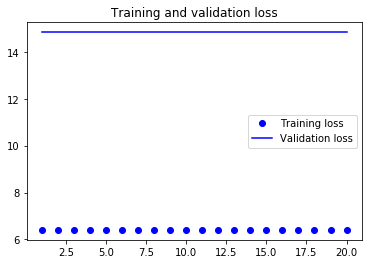

In [235]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show() 

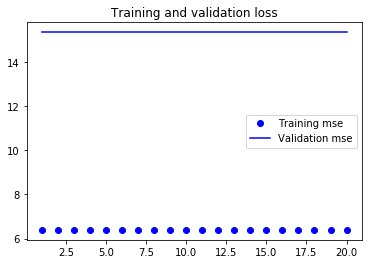

In [232]:
accuracy = history.history['mse']
val_accuracy = history.history['val_mse']
plt.plot(epochs, accuracy, 'bo', label='Training mse')
plt.plot(epochs, val_accuracy, 'b', label='Validation mse')
plt.title('Training and validation loss')
plt.legend()
plt.show() 

**Model의 Capacity를 증가**

In [240]:
model = Sequential()
# 출력값의 크기를 16로 설정 
model.add(LSTM(16, input_dim = input_dim, input_length = input_length))
# 최대 출력값이 1보다 크므로, relu 함수를 최정 활성 함수로 사용 
model.add(Dense(output_dim, activation='relu'))

# 연속형 데이터에 대한 평가 지표 정의 
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mse'])

# batch_size를 10, epoch을 4로 설정, Validation Set 설정 후 모델 생성 
history = model.fit(X_train, y_train,
              batch_size=10, nb_epoch=20,
              verbose = 1,
              validation_split=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(16, input_shape=(58, 6))`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 46 samples, validate on 12 samples
Epoch 1/20
46/46 [==============================] - 0s 7ms/step - loss: 5.2957 - mse: 5.2957 - val_loss: 8.7567 - val_mse: 8.7567
Epoch 2/20
46/46 [==============================] - 0s 1ms/step - loss: 2.9750 - mse: 2.9750 - val_loss: 6.3811 - val_mse: 6.3811
Epoch 3/20
46/46 [==============================] - 0s 1ms/step - loss: 2.0550 - mse: 2.0550 - val_loss: 4.8365 - val_mse: 4.8365
Epoch 4/20
46/46 [==============================] - 0s 1ms/step - loss: 1.5261 - mse: 1.5261 - val_loss: 3.8651 - val_mse: 3.8651
Epoch 5/20
46/46 [==============================] - 0s 1ms/step - loss: 1.2223 - mse: 1.2223 - val_loss: 3.1555 - val_mse: 3.1555
Epoch 6/20
46/46 [==============================] - 0s 1ms/step - loss: 1.0454 - mse: 1.0454 - val_loss: 2.6820 - val_mse: 2.6820
Epoch 7/20
46/46 [==============================] - 0s 1ms/step - loss: 0.9319 - mse: 0.9319 - val_loss: 2.3773 - val_mse: 2.3773
Epoch 8/20
46/46 [============================

In [241]:
epochs = range(1, 21)

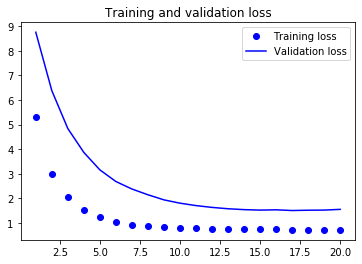

In [242]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show() 

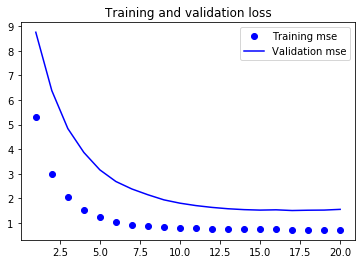

In [243]:
accuracy = history.history['mse']
val_accuracy = history.history['val_mse']
plt.plot(epochs, accuracy, 'bo', label='Training mse')
plt.plot(epochs, val_accuracy, 'b', label='Validation mse')
plt.title('Training and validation loss')
plt.legend()
plt.show() 

**양방향 LSTM 적용**

In [246]:
model = Sequential()
# 출력값의 크기를 16로 설정 
model.add(Bidirectional(LSTM(16, input_dim = input_dim, input_length = input_length)))
# 최대 출력값이 1보다 크므로, relu 함수를 최정 활성 함수로 사용 
model.add(Dense(output_dim, activation='relu'))

# 연속형 데이터에 대한 평가 지표 정의 
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mse'])

# batch_size를 10, epoch을 4로 설정, Validation Set 설정 후 모델 생성 
history = model.fit(X_train, y_train,
              batch_size=10, nb_epoch=20,
              verbose = 1,
              validation_split=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(16, input_shape=(58, 6))`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  app.launch_new_instance()


Train on 46 samples, validate on 12 samples
Epoch 1/20
46/46 [==============================] - 1s 12ms/step - loss: 5.1628 - mse: 5.1628 - val_loss: 12.3310 - val_mse: 12.3310
Epoch 2/20
46/46 [==============================] - 0s 1ms/step - loss: 2.9510 - mse: 2.9510 - val_loss: 9.9550 - val_mse: 9.9550
Epoch 3/20
46/46 [==============================] - 0s 1ms/step - loss: 1.7367 - mse: 1.7367 - val_loss: 8.4703 - val_mse: 8.4703
Epoch 4/20
46/46 [==============================] - 0s 1ms/step - loss: 1.1846 - mse: 1.1846 - val_loss: 7.5194 - val_mse: 7.5194
Epoch 5/20
46/46 [==============================] - 0s 1ms/step - loss: 0.9501 - mse: 0.9501 - val_loss: 6.8480 - val_mse: 6.8480
Epoch 6/20
46/46 [==============================] - 0s 1ms/step - loss: 0.8161 - mse: 0.8161 - val_loss: 6.3909 - val_mse: 6.3909
Epoch 7/20
46/46 [==============================] - 0s 1ms/step - loss: 0.7558 - mse: 0.7558 - val_loss: 6.0855 - val_mse: 6.0855
Epoch 8/20
46/46 [=========================

In [247]:
epochs = range(1, 21)

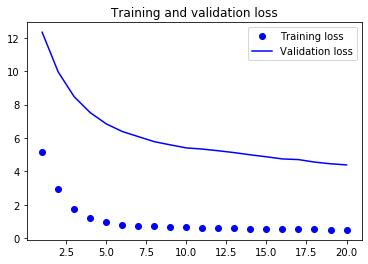

In [248]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show() 

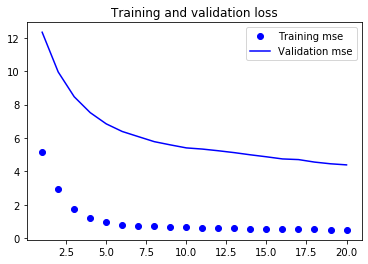

In [249]:
accuracy = history.history['mse']
val_accuracy = history.history['val_mse']
plt.plot(epochs, accuracy, 'bo', label='Training mse')
plt.plot(epochs, val_accuracy, 'b', label='Validation mse')
plt.title('Training and validation loss')
plt.legend()
plt.show() 

**규제를 적용**

In [251]:
model = Sequential()
# 출력값의 크기를 16로 설정 
model.add(Bidirectional(LSTM(16, input_dim = input_dim, input_length = input_length)))
# Drop Out 적용
model.add(Dropout(0.5))
# 최대 출력값이 1보다 크므로, relu 함수를 최정 활성 함수로 사용 
model.add(Dense(output_dim, activation='relu'))

# 연속형 데이터에 대한 평가 지표 정의 
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['mse'])

# batch_size를 10, epoch을 4로 설정, Validation Set 설정 후 모델 생성 
history = model.fit(X_train, y_train,
              batch_size=10, nb_epoch=20,
              verbose = 1,
              validation_split=0.2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(16, input_shape=(58, 6))`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 46 samples, validate on 12 samples
Epoch 1/20
46/46 [==============================] - 1s 12ms/step - loss: 3.6404 - mse: 3.6404 - val_loss: 9.6648 - val_mse: 9.6648
Epoch 2/20
46/46 [==============================] - 0s 1ms/step - loss: 2.4207 - mse: 2.4207 - val_loss: 6.9952 - val_mse: 6.9952
Epoch 3/20
46/46 [==============================] - 0s 1ms/step - loss: 1.7995 - mse: 1.7995 - val_loss: 5.7294 - val_mse: 5.7294
Epoch 4/20
46/46 [==============================] - 0s 1ms/step - loss: 1.4061 - mse: 1.4061 - val_loss: 5.0892 - val_mse: 5.0892
Epoch 5/20
46/46 [==============================] - 0s 2ms/step - loss: 1.3016 - mse: 1.3016 - val_loss: 4.7199 - val_mse: 4.7199
Epoch 6/20
46/46 [==============================] - 0s 2ms/step - loss: 1.0725 - mse: 1.0725 - val_loss: 4.5528 - val_mse: 4.5528
Epoch 7/20
46/46 [==============================] - 0s 3ms/step - loss: 1.2459 - mse: 1.2459 - val_loss: 4.5287 - val_mse: 4.5287
Epoch 8/20
46/46 [===========================

In [252]:
epochs = range(1, 21)

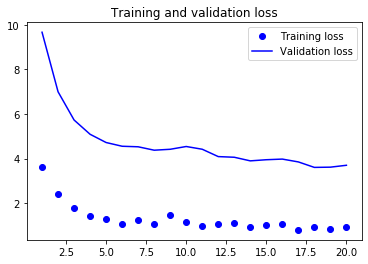

In [253]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show() 

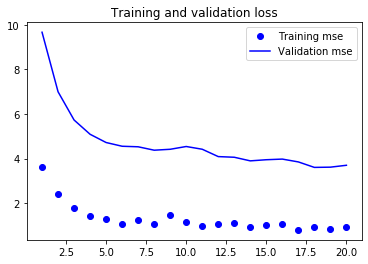

In [254]:
accuracy = history.history['mse']
val_accuracy = history.history['val_mse']
plt.plot(epochs, accuracy, 'bo', label='Training mse')
plt.plot(epochs, val_accuracy, 'b', label='Validation mse')
plt.title('Training and validation loss')
plt.legend()
plt.show() 

In [255]:
print('Done')

Done
